# Happiness report - data analysis

Report of analysis the 2015-2022 countries' happiness ranking data. 
It consists of:
* combining csv files with data from different years,
* initial data frame verification, removing redundant columns, improving data types, looking for NaN values,
* analysis of the data held by grouping, looking for dependencies, 
* verification of the greatest changes in the happiness ranking in the happiness score column, visualization of these changes and their analysis
* using prepared method to chose the country based on the selected parameter,
* comparing the results for selected 2 countries.

### Import necessary libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from country_data_validator import CoutriesDataValidator

### Use of combine_df method to prepare initial data frame

In [2]:
happiness_df = CoutriesDataValidator.combine_dfs_from_selected_dir('./data/happiness_report_2015_2022/*.csv')

### Preliminary data verification

In [3]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0.1                   1229 non-null   int64 
 1   Unnamed: 0                     1229 non-null   int64 
 2   Happiness Rank                 1229 non-null   int64 
 3   Country                        1229 non-null   object
 4   Region                         1229 non-null   object
 5   Happiness Score                1229 non-null   object
 6   Economy (GDP per Capita)       1229 non-null   object
 7   Family (Social Support)        1229 non-null   object
 8   Health (Life Expectancy)       1229 non-null   object
 9   Freedom                        1229 non-null   object
 10  Trust (Government Corruption)  1229 non-null   object
 11  Generosity                     1229 non-null   object
 12  Year                           1229 non-null   int64 
dtypes: i

In [4]:
list_of_float_columns = ['Happiness Score', 'Economy (GDP per Capita)',
       'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']
columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0']
happiness_df = CoutriesDataValidator.clean_data(happiness_df, list_of_float_columns, columns_to_remove)
happiness_df

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana,-,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,2022
142,143,Rwanda,-,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,2022
143,144,Zimbabwe,Sub-Saharan Africa,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,2022
144,145,Lebanon,Middle East and Northern Africa,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,2022


##### Veryfication if any of data series contains NaN values

In [5]:
happiness_df.isna().sum()

Happiness Rank                   0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

#### Grouping results for countries, to compare their score over the years

In [6]:
grouped_data = happiness_df[['Country','Happiness Score']].groupby('Country').agg([min, max, 'mean'])
grouped_data

Happiness Score                 
                        min    max      mean
Country                                     
Afghanistan          2.4040  3.794  3.132237
Albania              4.5860  5.199  4.845213
Algeria              4.8870  6.355  5.419012
Angola               3.7950  4.033  3.872250
Argentina            5.9290  6.650  6.270962
...                     ...    ...       ...
Venezuela            4.7070  6.810  5.315900
Vietnam              5.0610  5.485  5.252812
Yemen                3.3550  4.197  3.688925
Zambia               3.7594  5.129  4.314300
Zimbabwe             2.9950  4.610  3.684025

[175 rows x 3 columns]

### Correlation verification for an example year

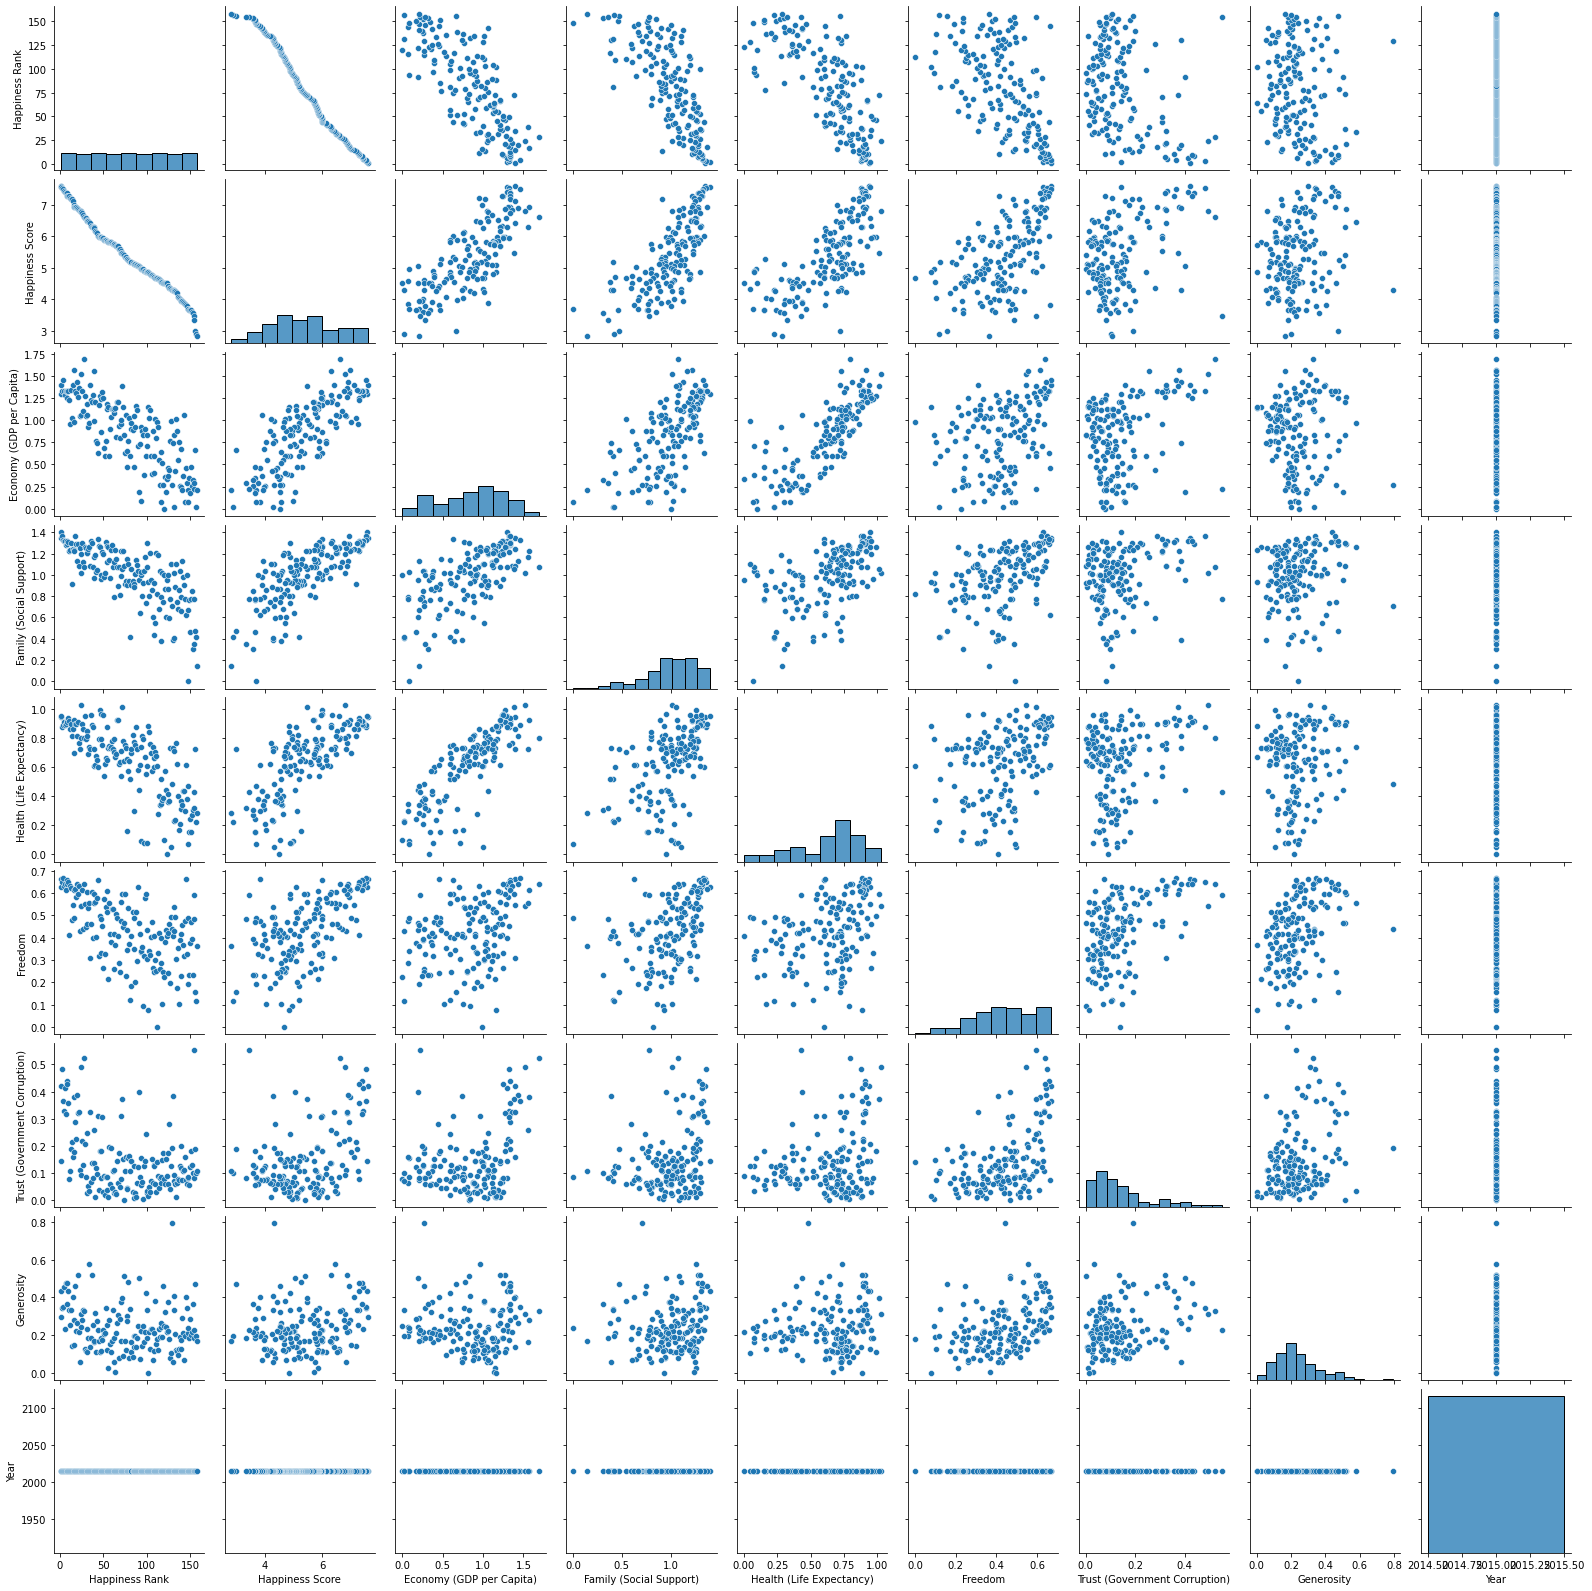

In [7]:
sns.pairplot(happiness_df[happiness_df['Year']==2015], kind="scatter")
plt.savefig('./data_collected/correlation_2015.png')

Rates that have the closest to linear correlation with Happieness (Score/Rank) are:
* Economy, 
* Health, 
* Family,
* Freedom

### Check the correlations using heatmap

<AxesSubplot:>

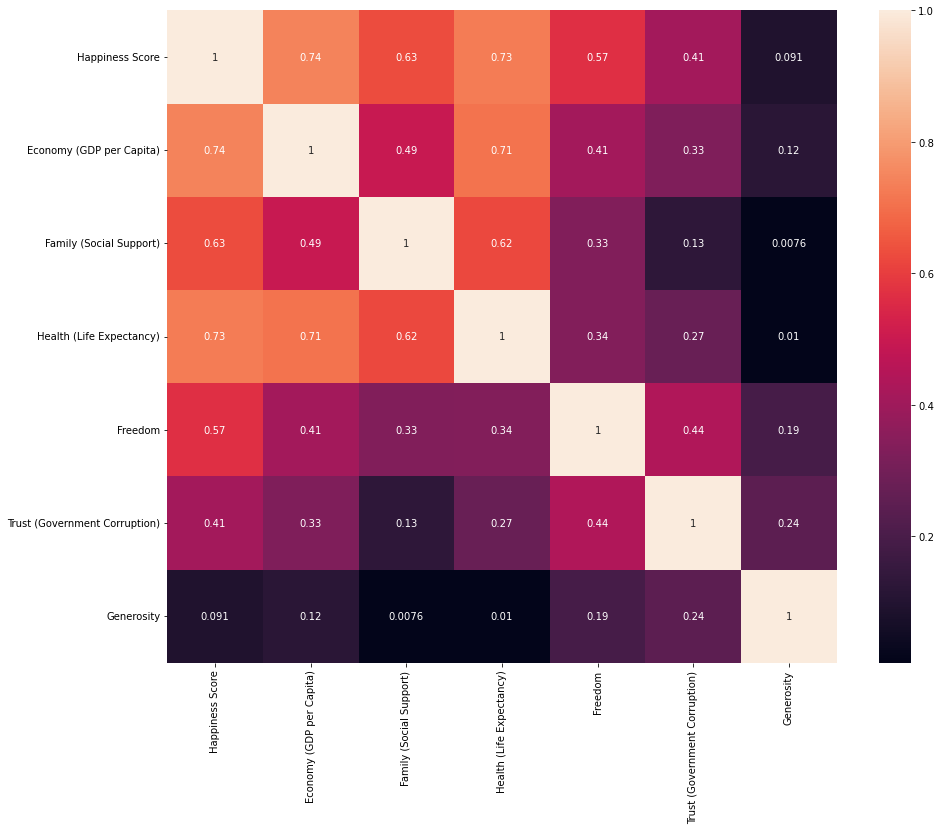

In [8]:
_, ax = plt.subplots(figsize=(15,12))
sns.heatmap(np.abs(happiness_df[['Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)',
                                              'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                                              'Generosity']].corr()), annot=True)

##### The highest correlation ratio is seen for Economy and Helath then for Family and Freedom

#### Diff column preparation to verify changes in Happiness Scores over the years

In [17]:
happiness_df['Diff'] = happiness_df.groupby('Country')['Happiness Score'].transform('max') - happiness_df.groupby('Country')['Happiness Score'].transform('min')
happiness_df

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Diff
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0.1070
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0.0670
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0.1236
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0.2290
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0.4020
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana,-,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,2022,0.8650
142,143,Rwanda,-,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,2022,0.2470
143,144,Zimbabwe,Sub-Saharan Africa,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,2022,1.6150
144,145,Lebanon,Middle East and Northern Africa,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,2022,2.4030


### Group by the countries to check Happiness score shift

In [18]:
group_diff = happiness_df[['Country', 'Diff']].groupby(['Country', 'Diff']).size().reset_index(name='sample_count')
group_diff

,Country,Diff,sample_count
0,Afghanistan,1.3900,8
1,Albania,0.6130,8
2,Algeria,1.4680,8
3,Angola,0.2380,4
4,Argentina,0.7210,8
...,...,...,...
170,Venezuela,2.1030,8
171,Vietnam,0.4240,8
172,Yemen,0.8420,8
173,Zambia,1.3696,8


#### Look into Countries with biggest differences in happiness scoring

In [19]:
biggest_diff = group_diff.sort_values(by='Diff', ascending=False).head(5)
biggest_diff

,Country,Diff,sample_count
84,Lebanon,2.403,8
170,Venezuela,2.103,8
14,Benin,1.876,8
73,Ivory Coast,1.651,8
86,Liberia,1.627,8


In [20]:
list_of_columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']

Lebanon_df = happiness_df[happiness_df['Country']=='Lebanon'][list_of_columns].sort_values(by='Year').reset_index(drop=True)
Venezuela_df = happiness_df[happiness_df['Country']=='Venezuela'][list_of_columns].sort_values(by='Year').reset_index(drop=True)
Benin_df = happiness_df[happiness_df['Country']=='Benin'][list_of_columns].sort_values(by='Year').reset_index(drop=True)
Ivory_Coast_df = happiness_df[happiness_df['Country']=='Ivory Coast'][list_of_columns].sort_values(by='Year').\
reset_index(drop=True)
Liberia_df = happiness_df[happiness_df['Country']=='Liberia'][list_of_columns].sort_values(by='Year').reset_index(drop=True)

biggest_diff_countries  = {'Lebanon':Lebanon_df, 'Venezuela':Venezuela_df, 'Benin':Benin_df, 'Ivory Coast':Ivory_Coast_df,
                           'Liberia':Liberia_df}


### Visualisation of chosen rates for investigated countries (with highest happiness ratio shifts in given time period)

Subplot for: Lebanon


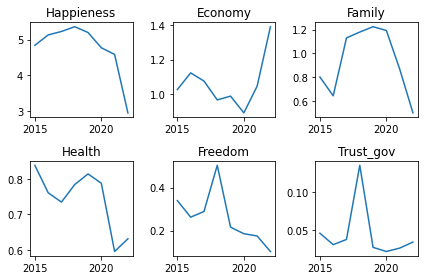

Subplot for: Venezuela


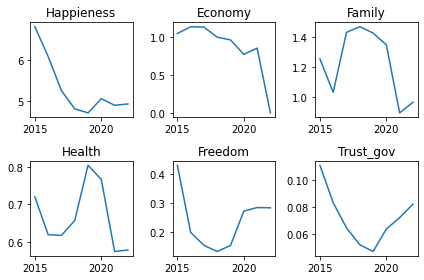

Subplot for: Benin


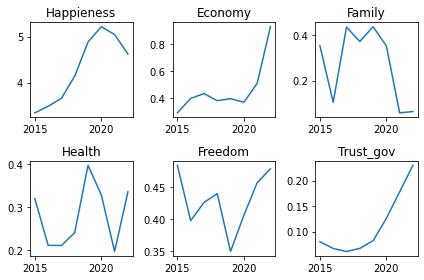

Subplot for: Ivory Coast


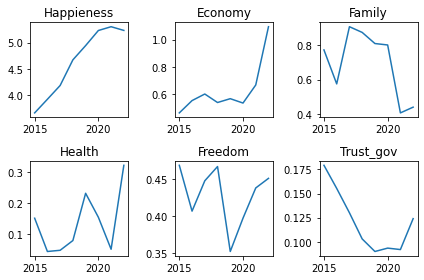

Subplot for: Liberia


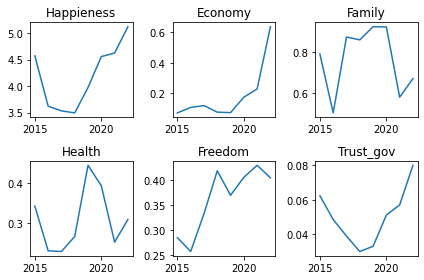

In [21]:
for country_name, country_df in biggest_diff_countries.items():
    print(f'Subplot for: {country_name}')
    CoutriesDataValidator.make_subplots_year_dependent(country_df)

* Lebanon - happiness score increased a litte bit, in the same time as Freedom and Trust_gov had it highest scores, which may be correlated with some political changes in the country, but it would have to be investigated further, with additional data. Later, the happiness score drasticly decreased. Even though the growth of Economy rate is observed, the rest of visualised rates  dropped.
* Venesuela - happiness rate decreased significantly. Small increase is seen in 2020 which may be correlated with Freedom and Trust_gov rates enhancement. Overall, the happiness score rate drop seems to be strongly correlated with Economy rate drop.
* Benin - happiness rate increased meaningfully with rising rate for Trust_gov. Correlation with other rates is not that obious and constant. The highest happiness score goes with high rate for Family and Health and low rate for Freedom. The highest economy increase goes with happiness score drop.
* Ivory Coast - happiness rate boost is seen. It's wierdly correlated with Trust_gove rate drop. Health rate increase is also observed  and correlated with Happiness.
* Liberia - happiness score drop and then boost can be observed. Its biggest fall is correlated with Health rate's and Trust_gov's fall. The biggest correlation for happiness score increase can be observed with Freedom, Trust_gov rates, also some correlation is seen with Family and Health - at the beginning of the happines rate surge, and Economy - at the end.

Not all correlations can be easily observed, one increase may influence the other with some delay, and also some of the rate's changes can make up for the others.

#### Check if multiple lines plot can offer another correlation insight

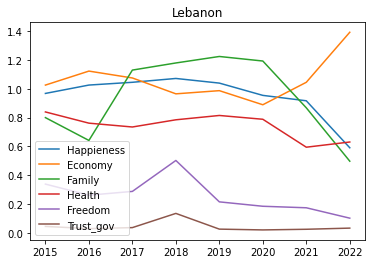

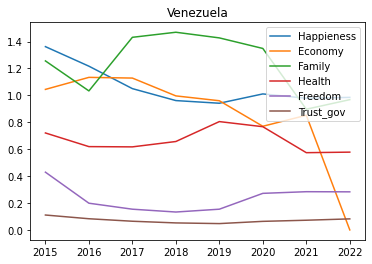

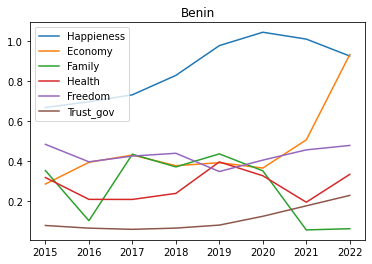

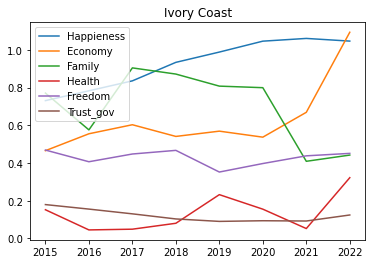

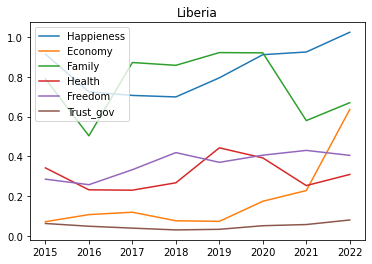

In [22]:
for country_name, country_df in biggest_diff_countries.items():
    country_df_modified = country_df
    #scale happiness score
    country_df_modified['Happiness Score'] = country_df_modified['Happiness Score']/5
    CoutriesDataValidator.make_multiple_lines_plot(country_df_modified, country_name)

### Choose your country depending on the parameter

In [24]:
parameter = 'Freedom'
chosen_country = CoutriesDataValidator.choose_your_country(parameter, happiness_df)
chosen_country_name = chosen_country['Country'].item()
print(f'Congratulations, regarding {parameter} rate, your chosen counntry is {chosen_country_name} \n')
chosen_country

Congratulations, regarding Freedom rate, your chosen counntry is Cambodia 



,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Diff
113,114,Cambodia,Southeastern Asia,4.64,1.019,0.732,0.505,0.74,0.068,0.166,2022,1.0294


### See df of two countries to easily compare them - for example: your current country with previously chosen country (with given parameter)

In [25]:
two_countries = CoutriesDataValidator.compare_two_countries(happiness_df, 'Poland', chosen_country_name, 2022)
two_countries

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Diff
47,48,Poland,Central and Eastern Europe,6.123,1.758,1.174,0.712,0.523,0.140,0.124,2022,0.3953
113,114,Cambodia,Southeastern Asia,4.640,1.019,0.732,0.505,0.740,0.068,0.166,2022,1.0294
